Found 4600 images belonging to 2 classes.
144/144 [==============================] - 48s 333ms/step - loss: 0.0043 - accuracy: 0.9993

Test Accuracy: 99.93%
Test Loss: 0.0043
144/144 [==============================] - 9s 64ms/step


C:\Users\allen\AppData\Local\Temp\ipykernel_29204\3725182732.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_names, y=[no_tumor_accuracy * 100, tumor_accuracy * 100], palette=["green", "red"])


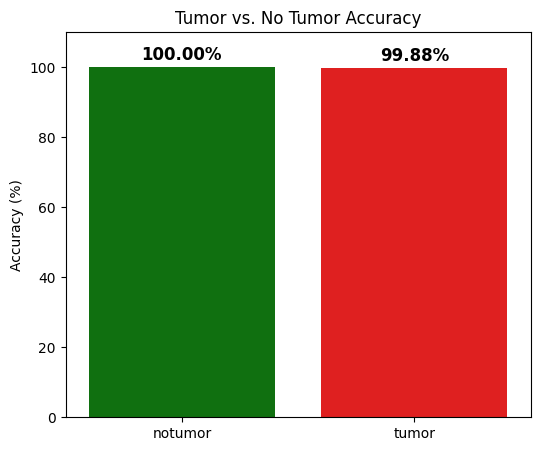

1/1 [==============================] - 0s 96ms/step


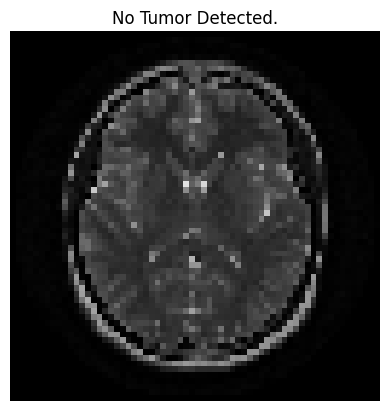

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import os
from PIL import ImageFile

# Prevent image truncation errors
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Load the trained model
model = load_model("Brain_tumor_simple_1.keras") #replace the directory with your model path

# Set test data directory
test_dir = r"Dataset_2\train" #replace the directory with your test data path

# Preprocess test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Convert to binary labels (0 or 1)

# Get true labels
true_labels = test_generator.classes  # Actual class labels from dataset
class_names = list(test_generator.class_indices.keys())  # ['no_tumor', 'tumor']

# Calculate accuracy for each class
tumor_correct = np.sum((predicted_labels == 1) & (true_labels == 1))
tumor_total = np.sum(true_labels == 1)
tumor_accuracy = tumor_correct / tumor_total if tumor_total > 0 else 0

no_tumor_correct = np.sum((predicted_labels == 0) & (true_labels == 0))
no_tumor_total = np.sum(true_labels == 0)
no_tumor_accuracy = no_tumor_correct / no_tumor_total if no_tumor_total > 0 else 0

# Plot bar chart for accuracy

# Plot bar chart for accuracy with percentage labels
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=class_names, y=[no_tumor_accuracy * 100, tumor_accuracy * 100], palette=["green", "red"])

# Add percentage labels on top of each bar
for i, acc in enumerate([no_tumor_accuracy * 100, tumor_accuracy * 100]):
    ax.text(i, acc + 2, f"{acc:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

plt.ylabel("Accuracy (%)")
plt.title("Tumor vs. No Tumor Accuracy")
plt.ylim(0, 110)  # Set y-axis limit slightly higher for text visibility
plt.show()


# Function to predict a single image
def predict_image(image_path, model):
    """Function to load an image, preprocess it, and predict tumor presence."""
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Prediction
    prediction = model.predict(img_array)
    label = "Tumor Detected!" if prediction[0][0] > 0.5 else "No Tumor Detected."

    # Show image with prediction
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
    plt.show()

# Choose a random image from the test dataset
random_image_path = os.path.join(test_dir, "notumor", os.listdir(os.path.join(test_dir, "notumor"))[0])
predict_image(random_image_path, model)
